In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')

In [4]:
# reading csv file containing GRE verbal and quant practice test scores
df = pd.read_csv("gre.csv")
display(df)
print(df.shape)

,Date,verbal_score,quant_score
0,09/01/2021,0.0,1.0
1,09/02/2021,1.0,2.0
2,09/03/2021,2.0,3.0
3,09/04/2021,3.0,NaN
4,09/05/2021,4.0,NaN
5,09/06/2021,NaN,NaN
6,09/07/2021,NaN,7.0
7,09/08/2021,7.0,8.0
8,09/09/2021,8.0,9.0
9,09/10/2021,9.0,10.0


(10, 3)


## Checking for missing values

In [5]:
# method 1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          10 non-null     object 
 1   verbal_score  8 non-null      float64
 2   quant_score   7 non-null      float64
dtypes: float64(2), object(1)
memory usage: 368.0+ bytes


In [6]:
# method 2
display(df.isna())
display(df.isna().sum())

,Date,verbal_score,quant_score
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,True
4,False,False,True
5,False,True,True
6,False,True,False
7,False,False,False
8,False,False,False
9,False,False,False


Date            0
verbal_score    2
quant_score     3
dtype: int64

In [7]:
# method 3
display(df.notna())
print(df.notna().sum())

,Date,verbal_score,quant_score
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,False
4,True,True,False
5,True,False,False
6,True,False,True
7,True,True,True
8,True,True,True
9,True,True,True


Date            10
verbal_score     8
quant_score      7
dtype: int64


### How to convert from string column to datetime column

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          10 non-null     datetime64[ns]
 1   verbal_score  8 non-null      float64       
 2   quant_score   7 non-null      float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 368.0 bytes


None

### How to set index

In [9]:
df = df.set_index('Date')

display(df)
print(df.shape)

,verbal_score,quant_score
Date,,
2021-09-01,0.0,1.0
2021-09-02,1.0,2.0
2021-09-03,2.0,3.0
2021-09-04,3.0,NaN
2021-09-05,4.0,NaN
2021-09-06,NaN,NaN
2021-09-07,NaN,7.0
2021-09-08,7.0,8.0
2021-09-09,8.0,9.0


(10, 2)


In [10]:
#df = df.dropna()
#display(df)

In [11]:
df.loc['09-01-2021':'09-08-2021', ['verbal_score']]

,verbal_score
Date,
2021-09-01,0.0
2021-09-02,1.0
2021-09-03,2.0
2021-09-04,3.0
2021-09-05,4.0
2021-09-06,NaN
2021-09-07,NaN
2021-09-08,7.0


In [12]:
df.iloc[:8, [0]]

,verbal_score
Date,
2021-09-01,0.0
2021-09-02,1.0
2021-09-03,2.0
2021-09-04,3.0
2021-09-05,4.0
2021-09-06,NaN
2021-09-07,NaN
2021-09-08,7.0


In [13]:
print(df.columns)
print(df.index)

Index(['verbal_score', 'quant_score'], dtype='object')
DatetimeIndex(['2021-09-01', '2021-09-02', '2021-09-03', '2021-09-04',
               '2021-09-05', '2021-09-06', '2021-09-07', '2021-09-08',
               '2021-09-09', '2021-09-10'],
              dtype='datetime64[ns]', name='Date', freq=None)


In [14]:
#print(df.verbal_score)

Date
2021-09-01    0.0
2021-09-02    1.0
2021-09-03    2.0
2021-09-04    3.0
2021-09-05    4.0
2021-09-06    NaN
2021-09-07    NaN
2021-09-08    7.0
2021-09-09    8.0
2021-09-10    9.0
Name: verbal_score, dtype: float64


In [15]:
#print(df['verbal_score'])

Date
2021-09-01    0.0
2021-09-02    1.0
2021-09-03    2.0
2021-09-04    3.0
2021-09-05    4.0
2021-09-06    NaN
2021-09-07    NaN
2021-09-08    7.0
2021-09-09    8.0
2021-09-10    9.0
Name: verbal_score, dtype: float64


In [16]:
#print(df.verbal_score.values)

[ 0.  1.  2.  3.  4. nan nan  7.  8.  9.]


In [17]:
#print(df['verbal_score'].values)

[ 0.  1.  2.  3.  4. nan nan  7.  8.  9.]


### Create a function for plotting

In [28]:
def time_series_plot(data, title):    
    plt.plot(data.index, data.verbal_score.values, label='verbal', marker='o')
    plt.plot(data.index, data.quant_score.values, label='quant', marker='o')

    plt.xticks(rotation=90)
    plt.ylabel("score")
    plt.legend()
    plt.title(title)

### Removing missing values

In [19]:
df_drop_all_nan = df.dropna()

display(df_drop_all_nan)
print(df_drop_all_nan.info())

,verbal_score,quant_score
Date,,
2021-09-01,0.0,1.0
2021-09-02,1.0,2.0
2021-09-03,2.0,3.0
2021-09-08,7.0,8.0
2021-09-09,8.0,9.0
2021-09-10,9.0,10.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2021-09-01 to 2021-09-10
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   verbal_score  6 non-null      float64
 1   quant_score   6 non-null      float64
dtypes: float64(2)
memory usage: 144.0 bytes
None


### Replacing missing values by mean

In [20]:
df_replaced_by_mean = df.fillna(df.mean())

display(df_replaced_by_mean)
display(df_replaced_by_mean.info())

,verbal_score,quant_score
Date,,
2021-09-01,0.00,1.000000
2021-09-02,1.00,2.000000
2021-09-03,2.00,3.000000
2021-09-04,3.00,5.714286
2021-09-05,4.00,5.714286
2021-09-06,4.25,5.714286
2021-09-07,4.25,7.000000
2021-09-08,7.00,8.000000
2021-09-09,8.00,9.000000


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2021-09-01 to 2021-09-10
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   verbal_score  10 non-null     float64
 1   quant_score   10 non-null     float64
dtypes: float64(2)
memory usage: 540.0 bytes


None

In [21]:
# df.mean()
# df_replaced_by_mean.mean()

### Replacing missing values by median

In [22]:
df_replaced_by_median = df.fillna(df.median())

display(df_replaced_by_median)
display(df_replaced_by_median.info())

,verbal_score,quant_score
Date,,
2021-09-01,0.0,1.0
2021-09-02,1.0,2.0
2021-09-03,2.0,3.0
2021-09-04,3.0,7.0
2021-09-05,4.0,7.0
2021-09-06,3.5,7.0
2021-09-07,3.5,7.0
2021-09-08,7.0,8.0
2021-09-09,8.0,9.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2021-09-01 to 2021-09-10
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   verbal_score  10 non-null     float64
 1   quant_score   10 non-null     float64
dtypes: float64(2)
memory usage: 540.0 bytes


None

### Replacing missing values by constant

In [23]:
df_replaced_by_zero = df.fillna(0)

display(df_replaced_by_zero)
display(df_replaced_by_zero.info())

,verbal_score,quant_score
Date,,
2021-09-01,0.0,1.0
2021-09-02,1.0,2.0
2021-09-03,2.0,3.0
2021-09-04,3.0,0.0
2021-09-05,4.0,0.0
2021-09-06,0.0,0.0
2021-09-07,0.0,7.0
2021-09-08,7.0,8.0
2021-09-09,8.0,9.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2021-09-01 to 2021-09-10
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   verbal_score  10 non-null     float64
 1   quant_score   10 non-null     float64
dtypes: float64(2)
memory usage: 540.0 bytes


None

### Replacing missing values by interpolation

In [24]:
df_interpolate = df.interpolate()

display(df_interpolate)
print(df_interpolate.info())

,verbal_score,quant_score
Date,,
2021-09-01,0.0,1.0
2021-09-02,1.0,2.0
2021-09-03,2.0,3.0
2021-09-04,3.0,4.0
2021-09-05,4.0,5.0
2021-09-06,5.0,6.0
2021-09-07,6.0,7.0
2021-09-08,7.0,8.0
2021-09-09,8.0,9.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2021-09-01 to 2021-09-10
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   verbal_score  10 non-null     float64
 1   quant_score   10 non-null     float64
dtypes: float64(2)
memory usage: 540.0 bytes
None


### Replacing missing values by forward imputation

In [25]:
df_forward = df.fillna(df.ffill())

display(df_forward)

,verbal_score,quant_score
Date,,
2021-09-01,0.0,1.0
2021-09-02,1.0,2.0
2021-09-03,2.0,3.0
2021-09-04,3.0,3.0
2021-09-05,4.0,3.0
2021-09-06,4.0,3.0
2021-09-07,4.0,7.0
2021-09-08,7.0,8.0
2021-09-09,8.0,9.0


### Replacing missing values by backward imputation

In [26]:
df_backward = df.fillna(df.bfill())

display(df_backward)

,verbal_score,quant_score
Date,,
2021-09-01,0.0,1.0
2021-09-02,1.0,2.0
2021-09-03,2.0,3.0
2021-09-04,3.0,7.0
2021-09-05,4.0,7.0
2021-09-06,7.0,7.0
2021-09-07,7.0,7.0
2021-09-08,7.0,8.0
2021-09-09,8.0,9.0


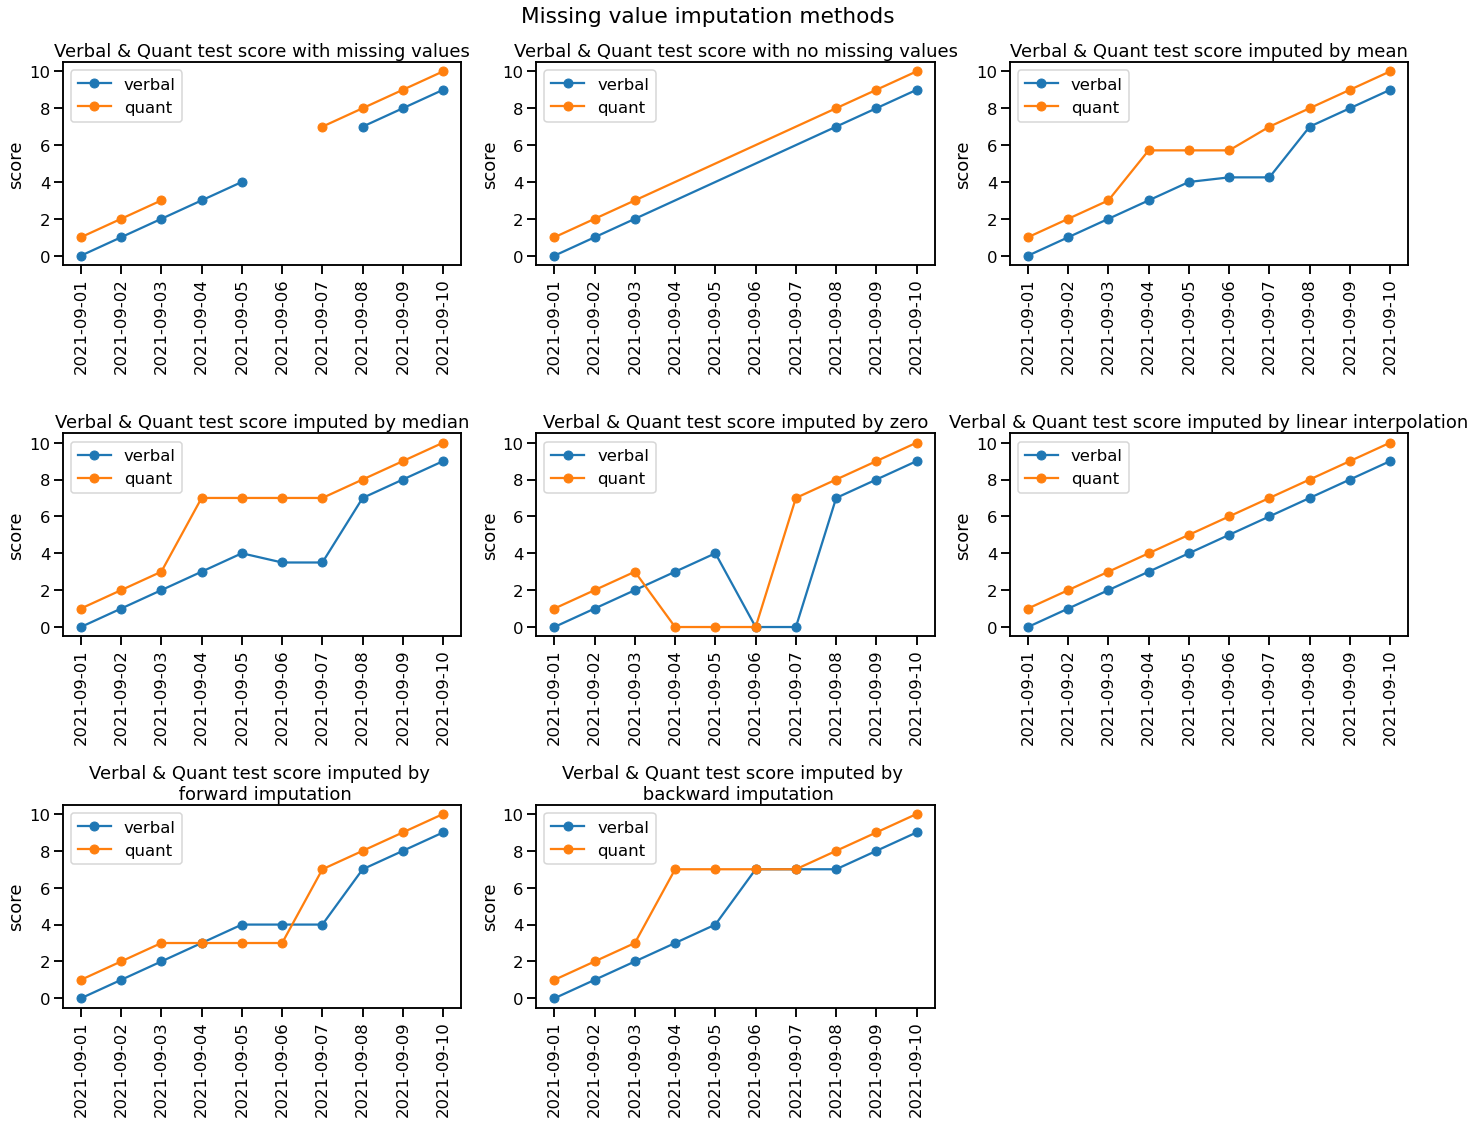

In [27]:
plt.figure(figsize=(20,16))

plt.subplot(3, 3, 1)
time_series_plot(df, "Verbal & Quant test score with missing values")

plt.subplot(3, 3, 2)
time_series_plot(df_drop_all_nan, "Verbal & Quant test score with no missing values")

plt.subplot(3, 3, 3)
time_series_plot(df_replaced_by_mean, "Verbal & Quant test score imputed by mean")

plt.subplot(3, 3, 4)
time_series_plot(df_replaced_by_median, "Verbal & Quant test score imputed by median")

plt.subplot(3, 3, 5)
time_series_plot(df_replaced_by_zero, "Verbal & Quant test score imputed by zero")

plt.subplot(3, 3, 6)
time_series_plot(df_interpolate, "Verbal & Quant test score imputed by linear interpolation")

plt.subplot(3, 3, 7)
time_series_plot(df_forward, "Verbal & Quant test score imputed by \n forward imputation")

plt.subplot(3, 3, 8)
time_series_plot(df_backward, "Verbal & Quant test score imputed by \n backward imputation")


plt.suptitle("Missing value imputation methods")
plt.tight_layout()
plt.show()